In [0]:
#packages/libraries in python

In [0]:
def add(a,b):
  return a+b

In [0]:
#numpy, pandas, scikit-learn/sklearn
import numpy as np
a = np.array([[2,3,4],[5,5,8]])
col = a.shape[1]
row = a.shape[0]
print('It has {} rows and {} cols'.format(row,col))

It has 2 rows and 3 cols


In [0]:
b = np.array([[3,2,1],[4,3,6]])
a+b

array([[ 6,  6,  4],
       [20, 15, 48]])

In [0]:
c = np.array([[2],[1],[4]])
np.matmul(a,c)
#np.matmul(a,b)

array([[23],
       [47]])

In [0]:
#pandas
#!pip install pandas

In [0]:
import pandas as pd
#Dataframe
df = pd.DataFrame(b,columns=['x1','x2','x3'])
df

,x1,x2,x3
0,3,2,1
1,4,3,6


In [0]:
df[['x1','x3']]

,x1,x3
0,3,1
1,4,6


In [0]:
data = pd.read_csv('/content/datasets_43_77_battles.csv')
data.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [0]:
data.shape

(38, 25)

In [0]:
data.defender_king

0                   Robb Stark
1                   Robb Stark
2                   Robb Stark
3     Joffrey/Tommen Baratheon
4     Joffrey/Tommen Baratheon
5     Joffrey/Tommen Baratheon
6                   Robb Stark
7                   Robb Stark
8                   Robb Stark
9                   Robb Stark
10         Balon/Euron Greyjoy
11                  Robb Stark
12         Balon/Euron Greyjoy
13                  Robb Stark
14    Joffrey/Tommen Baratheon
15             Renly Baratheon
16                  Robb Stark
17    Joffrey/Tommen Baratheon
18    Joffrey/Tommen Baratheon
19    Joffrey/Tommen Baratheon
20    Joffrey/Tommen Baratheon
21    Joffrey/Tommen Baratheon
22                         NaN
23                  Robb Stark
24                         NaN
25                  Robb Stark
26    Joffrey/Tommen Baratheon
27                Mance Rayder
28         Balon/Euron Greyjoy
29                         NaN
30         Balon/Euron Greyjoy
31    Joffrey/Tommen Baratheon
32    Jo

In [0]:
data.defender_king.unique()

array(['Robb Stark', 'Joffrey/Tommen Baratheon', 'Balon/Euron Greyjoy',
       'Renly Baratheon', nan, 'Mance Rayder', 'Stannis Baratheon'],
      dtype=object)

In [0]:
data.defender_king.value_counts()

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Renly Baratheon              1
Mance Rayder                 1
Name: defender_king, dtype: int64

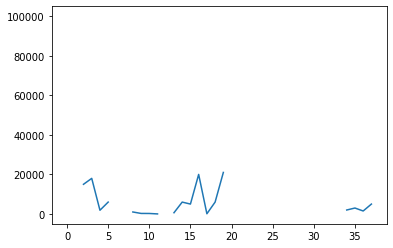

In [0]:
data.attacker_size.plot()

In [0]:
#missing value filling
data.attacker_size.fillna(1000)

0      15000.0
1       1000.0
2      15000.0
3      18000.0
4       1875.0
5       6000.0
6       1000.0
7       1000.0
8       1000.0
9        264.0
10       244.0
11        20.0
12      1000.0
13       618.0
14      6000.0
15      5000.0
16     20000.0
17       100.0
18      6000.0
19     21000.0
20      1000.0
21      3000.0
22      1000.0
23      1000.0
24      1000.0
25      3500.0
26      1000.0
27    100000.0
28      1000.0
29      1000.0
30      4500.0
31      1000.0
32      1000.0
33      1000.0
34      2000.0
35      3000.0
36      1500.0
37      5000.0
Name: attacker_size, dtype: float64

In [0]:
data.attacker_size.fillna(method='ffill',inplace=True)
data.attacker_size

0      15000.0
1      15000.0
2      15000.0
3      18000.0
4       1875.0
5       6000.0
6       6000.0
7       6000.0
8       1000.0
9        264.0
10       244.0
11        20.0
12        20.0
13       618.0
14      6000.0
15      5000.0
16     20000.0
17       100.0
18      6000.0
19     21000.0
20     21000.0
21      3000.0
22      3000.0
23      3000.0
24      3000.0
25      3500.0
26      3500.0
27    100000.0
28    100000.0
29    100000.0
30      4500.0
31      4500.0
32      4500.0
33      4500.0
34      2000.0
35      3000.0
36      1500.0
37      5000.0
Name: attacker_size, dtype: float64

In [0]:
#sklearn
import sklearn
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split

dataSub = data[['attacker_size','defender_size','major_death','attacker_outcome']]
dataSub.head(3)

,attacker_size,defender_size,major_death,attacker_outcome
0,15000.0,4000.0,1.0,win
1,15000.0,120.0,1.0,win
2,15000.0,10000.0,0.0,win


In [0]:
dataSub.fillna(method='ffill',inplace=True)
X = dataSub[['attacker_size','defender_size','major_death']]
y = dataSub['attacker_outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3)
y_test

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


25     win
29     win
7      win
36     win
9      win
1      win
31     win
20     win
5      win
21    loss
2      win
16    loss
Name: attacker_outcome, dtype: object

In [0]:
dtClf = DT()
dtClf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred = dtClf.predict(X_test)
print('predictions: ',pred)
print('Actual values',list(y_test))


predictions:  ['win' 'win' 'win' 'win' 'win' 'win' 'win' 'win' 'win' 'win' 'win' 'win']
Actual values ['win', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'loss', 'win', 'loss']


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy: ',accuracy_score(pred,y_test))
print('Precsion: ',precision_score(pred,y_test,pos_label='win'))
print('Recall: ',recall_score(pred,y_test,pos_label='win'))

Accuracy:  0.8333333333333334
Precsion:  1.0
Recall:  0.8333333333333334
